In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing as pp
from sklearn.linear_model import LinearRegression

In [5]:
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
data.describe(include='all')

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


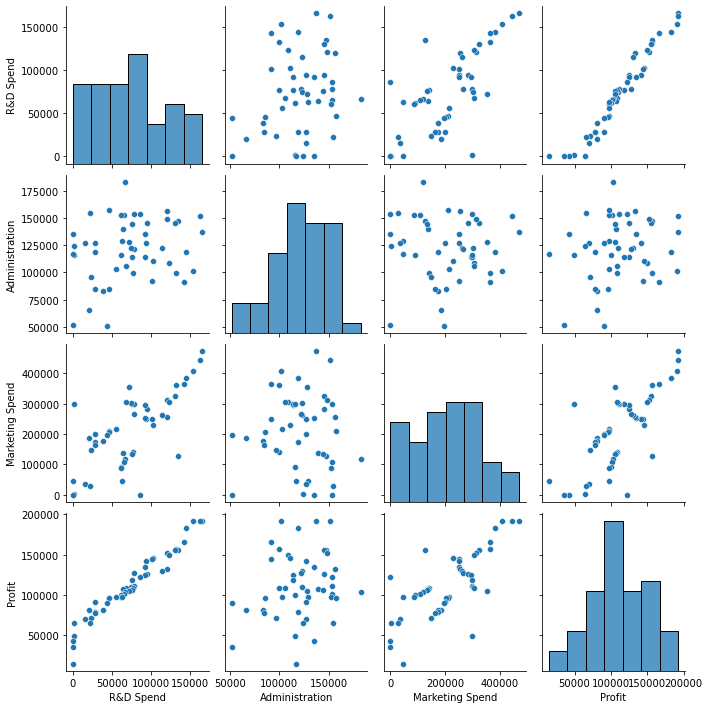

In [8]:
sns.pairplot(data)

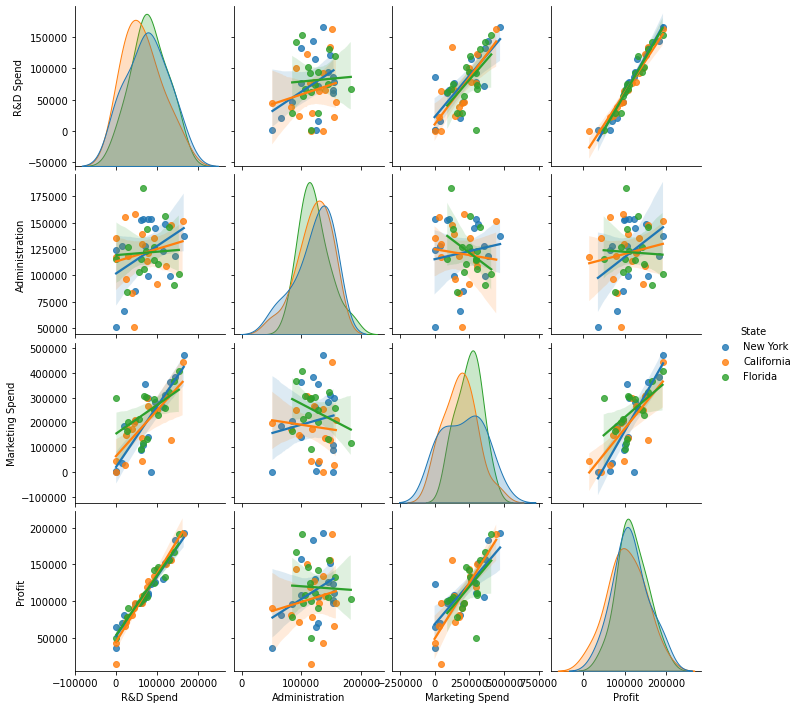

In [9]:
sns.pairplot(data,hue='State',kind='reg')

In [10]:
data_proc = pd.concat([data,data['State'].str.get_dummies()], axis=1)
data_proc.drop('State', axis=1, inplace=True)
data_proc.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [41]:
rnd = pd.DataFrame(pp.PolynomialFeatures(3).fit_transform(data_proc[['R&D Spend']]),columns=['rnd0','rnd1','rnd2','rnd3'])
ms = pd.DataFrame(pp.PolynomialFeatures(3).fit_transform(data_proc[['Marketing Spend']]),columns=['ms0','ms1','ms2','ms3'])

In [42]:
df = pd.concat([data_proc,rnd,ms],axis=1)
df.drop(['R&D Spend','Marketing Spend'], axis=1, inplace=True)
df.head()

,Administration,Profit,California,Florida,New York,rnd0,rnd1,rnd2,rnd3,ms0,ms1,ms2,ms3
0,136897.80,192261.83,0,0,1,1.0,165349.20,2.734036e+10,4.520706e+15,1.0,471784.10,2.225802e+11,1.050098e+17
1,151377.59,191792.06,1,0,0,1.0,162597.70,2.643801e+10,4.298760e+15,1.0,443898.53,1.970459e+11,8.746839e+16
2,101145.55,191050.39,0,1,0,1.0,153441.51,2.354430e+10,3.612672e+15,1.0,407934.54,1.664106e+11,6.788463e+16
3,118671.85,182901.99,0,0,1,1.0,144372.41,2.084339e+10,3.009211e+15,1.0,383199.62,1.468419e+11,5.626978e+16
4,91391.77,166187.94,0,1,0,1.0,142107.34,2.019450e+10,2.869786e+15,1.0,366168.42,1.340793e+11,4.909561e+16


In [47]:
x=df.drop('Profit',axis=1)
y=df['Profit']

In [48]:
x.shape

(50, 12)

In [49]:
model_profit = LinearRegression().fit(x,y)

In [50]:
model_profit.score(x,y)*100

96.19361152481297

In [51]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [52]:
round(100*model_profit.score(x,y),2)

96.19

In [53]:
np.round(model_profit.predict(x),2)

array([188662.55, 194850.24, 186618.68, 174560.24, 174111.95, 158419.28,
       157977.62, 160019.92, 148667.24, 152522.35, 130665.49, 131171.29,
       126243.45, 125133.79, 147677.18, 142752.05, 118034.76, 127516.1 ,
       126071.61, 120347.4 , 117541.4 , 118162.14, 116181.16, 113017.11,
       109597.46, 102583.68, 107824.75, 111337.65, 101855.41, 101610.29,
        99879.47,  98978.61, 102152.12, 103451.71,  96706.32,  96864.19,
        81210.32,  95208.13,  71115.73,  88846.34,  79216.49,  78093.81,
        72139.81,  61980.57,  71073.2 ,  43564.59,  46789.13,  41918.19,
        43919.64,  35789.31])

In [54]:
pd.to_pickle(model_profit,'Stratup_Profit_Predict_Model.pkl')

In [55]:
x.columns

Index(['Administration', 'California', 'Florida', 'New York', 'rnd0', 'rnd1',
       'rnd2', 'rnd3', 'ms0', 'ms1', 'ms2', 'ms3'],
      dtype='object')